In [110]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import requests
import gmaps
import os

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Import API key
from config import g_key

# Configure gmaps API key
gmaps.configure(api_key=g_key)

In [111]:
# Files to load
stations_load = "Data/stations_county_count.csv"
evs_load = "Data/county_counts.csv"
evs_stations_load = "Data/ca_ev_stations.csv"

In [48]:
# Read the city data file and store it in a pandas DataFrame.
stations_df = pd.read_csv(stations_load)
stations_df.sort_values(by=['count'], inplace=True, ascending=True)
stations_df.head(15)

,count,county
57,2,Sierra
54,3,Glenn
56,3,Plumas
55,3,Modoc
53,4,Sutter
52,4,Alpine
51,5,Calaveras
50,6,Imperial
49,6,Yuba
48,6,Lassen


In [45]:
# Read the city data file and store it in a pandas DataFrame.
evs_df = pd.read_csv(evs_load)
evs_df.sort_values(by=['count'], inplace=True, ascending=True)
evs_df.head(15)

,count,geoid,county
24,14,06049,Modoc County
45,25,06091,Sierra County
1,38,06003,Alpine County
17,68,06035,Lassen County
5,125,06011,Colusa County
31,159,06063,Plumas County
52,169,06105,Trinity County
25,191,06051,Mono County
10,213,06021,Glenn County
13,243,06027,Inyo County


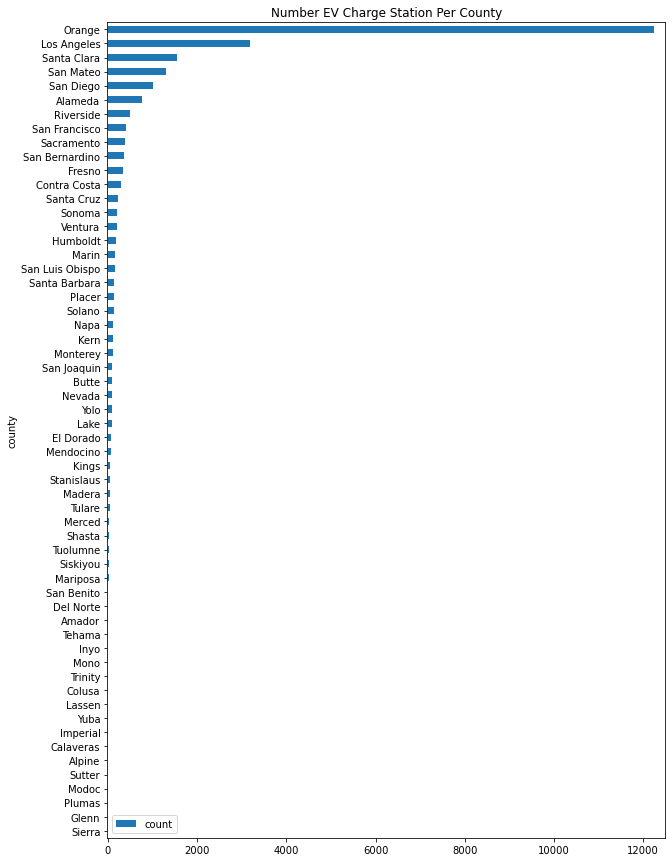

In [68]:
stations_df.plot(x="county", y="count", title= "Number EV Charge Station Per County", kind='barh', figsize= (10, 15))
plt.xlim(-10, 12500)
plt.show()

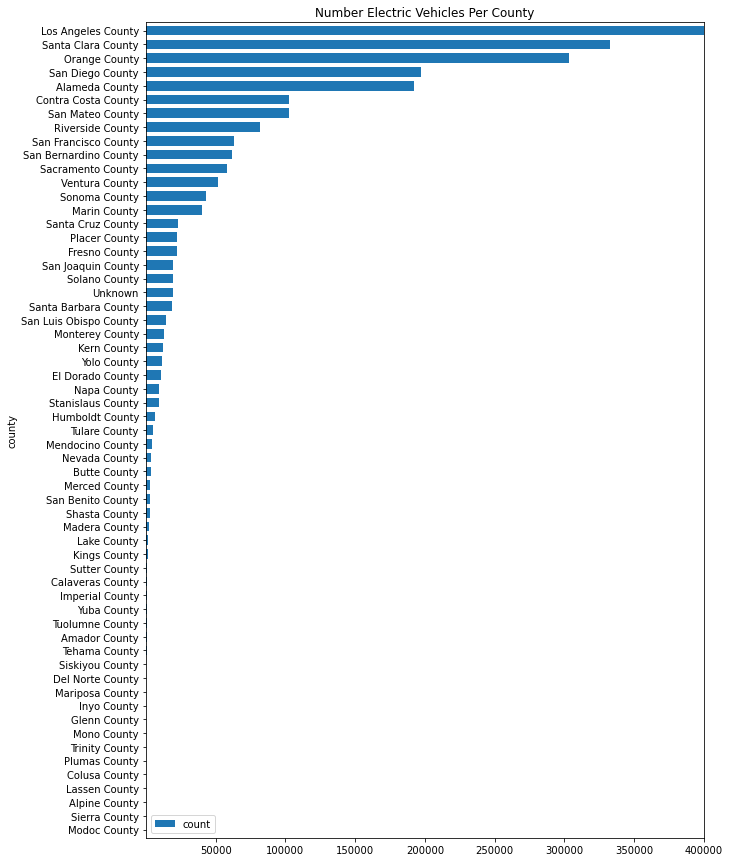

In [100]:
evs_df.plot(x="county", y="count", title= "Number Electric Vehicles Per County", kind='barh', width=.7, figsize= (10, 15))
plt.xlim(10, 400000)
plt.show()

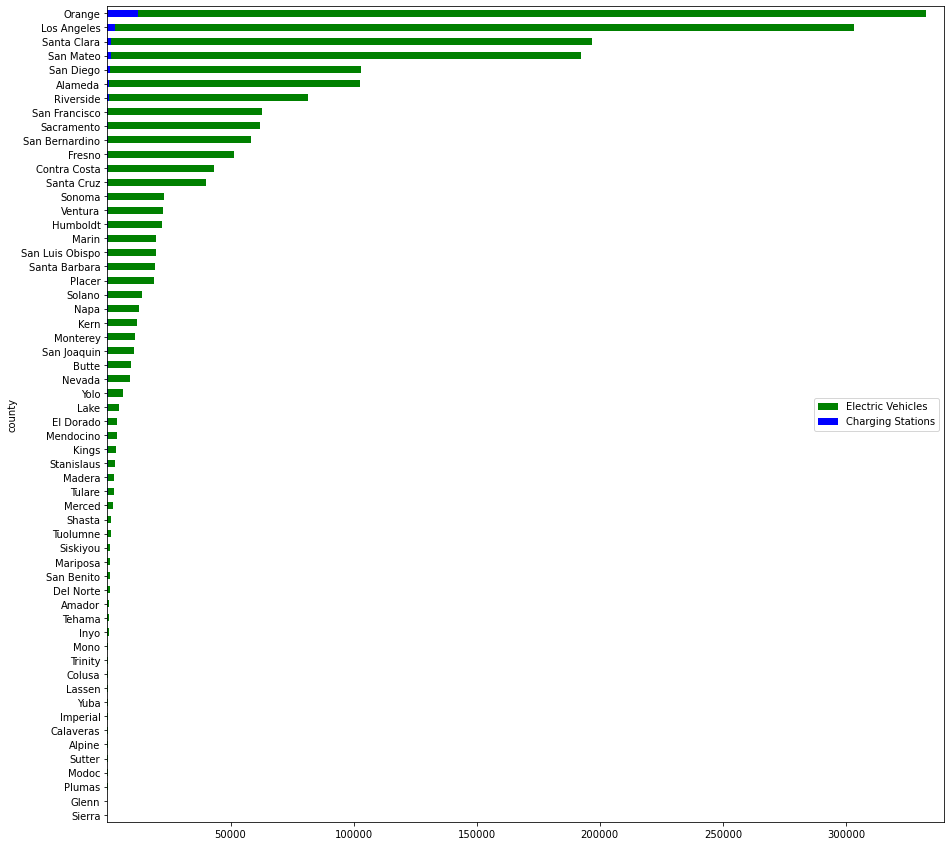

In [99]:
ax = plt.gca()
evs_df.plot(kind='barh', x='county', y= 'count', color='green', ax=ax, stacked=True, figsize=(15,15))
stations_df.plot(kind='barh', x='county', y= 'count', color='blue', ax=ax )
plt.xlim(10, 340000)
plt.legend(['Electric Vehicles', 'Charging Stations'], loc='center right')
plt.show()

In [103]:
# Read the city data file and store it in a pandas DataFrame.
clean_hotel_df.to_csv(evs_stations_df, index_label="geoid")
evs_stations_df = pd.read_csv(evs_stations_load)
evs_stations_df.sort_values(by=['county'], inplace=True, ascending=True)
evs_stations_df.head(15)

,fuel_type_code,station_name,street_address,city,state_abbr,zip,status_code,groups_with_access_code,access_days_time,ev_level1_evse_num,ev_level2_evse_num,ev_dc_fast_count,latitude,longitude,ev_pricing,county,geoid
21202,ELEC,Soundland Mall,1 Southland Mall Dr,Hayward,CA,94545,E,Public - Credit card at all times,24 hours daily,NaN,2.0,NaN,37.651779,-122.100228,FREE,Alameda,6001
8730,ELEC,MBApts_Berkeley_S,1945 Berkeley Way,Berkeley,CA,94704,E,Public,24 hours daily,NaN,10.0,NaN,37.872887,-122.271282,NaN,Alameda,6001
13764,ELEC,CLPCCD LOT G-STATION 3,25555 Hesperian Blvd,Hayward,CA,94545,E,Public,24 hours daily,NaN,2.0,NaN,37.639629,-122.103517,NaN,Alameda,6001
13765,ELEC,CHABOT COLLEGE LOT D-STATION 1,25555 Hesperian Blvd,Hayward,CA,94545,E,Public,24 hours daily,NaN,2.0,NaN,37.641763,-122.107581,NaN,Alameda,6001
13766,ELEC,CLPCCD LOT G-STATION 1,25555 Hesperian Blvd,Hayward,CA,94545,E,Public,24 hours daily,NaN,2.0,NaN,37.639631,-122.103544,NaN,Alameda,6001
21201,ELEC,Soundland Mall,1 Southland Mall Dr,Hayward,CA,94545,E,Public - Credit card at all times,24 hours daily,NaN,2.0,NaN,37.650149,-122.102357,FREE,Alameda,6001
21852,ELEC,Lucky,5000 Mowry Ave,Fremont,CA,94538,E,Public,24 hours daily,NaN,1.0,5.0,37.534191,-121.997070,NaN,Alameda,6001
24086,ELEC,CA FREMONT 20,5588 Cushing Pkwy,Fremont,CA,94538,E,Public,24 hours daily,NaN,2.0,NaN,37.495379,-121.973417,NaN,Alameda,6001
24087,ELEC,CA FREMONT 21,5588 Cushing Pkwy,Fremont,CA,94538,E,Public,24 hours daily,NaN,2.0,NaN,37.495359,-121.973442,NaN,Alameda,6001
5840,ELEC,ALAMEDA AMADOR 4K 001,24360 Amador St,Hayward,CA,94544,E,Public,24 hours daily,NaN,2.0,NaN,37.657775,-122.093497,NaN,Alameda,6001


In [112]:
# 9. Using the template add city name, the country code, the weather description and maximum temperature for the city.
info_box_template = """
<dl>
<dt>Station Name</dt><dd>{station_name}</dd>
<dt>City</dt><dd>{city}</dd>
<dt>Country</dt><dd>{county}</dd>
</dl>
"""

station_info = [info_box_template.format(**row) for index, row in evs_stations_df.iterrows()]

locations = evs_stations_df[["latitude", "longitude"]]

In [114]:
# 11a. Add a marker layer for each city to the map. 
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=3)
marker_layer = gmaps.marker_layer(locations, info_box_content=station_info)
#fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# 11b. Display the figure
fig

Figure(layout=FigureLayout(height='420px'))